In [61]:
import pandas as pd
import opendatasets as od
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.backend import manual_variable_initialization 
from tensorflow.keras.models import model_from_yaml
!pip3 install PyYAML

In [62]:
manual_variable_initialization(True)

In [63]:
od.download("https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-images")

Skipping, found downloaded files in "./ship-and-iceberg-images" (use force=True to force download)


In [64]:
import os
for dirname, _, filenames in os.walk('/home/apprenant/PycharmProjects/ClimateProject---E3/ship-and-iceberg-images/input_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Load the data

In [65]:
npz = np.load('/home/apprenant/PycharmProjects/ClimateProject---E3/Data analysis/ship-and-iceberg-images/input_data.npz')

x = npz['X_train']
y = npz['Y_train']
del npz

In [66]:
print(type(x))

<class 'numpy.ndarray'>


In [67]:
print('shape of picture: {}'.format(x.shape))
print('shape of picture: {}'.format(y.shape))

shape of picture: (4113, 75, 75, 3)
shape of picture: (4113,)


In [68]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)
# Second split the 20% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.8, random_state=1, stratify=y_valtest)

In [69]:
print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)

(3290, 75, 75, 3)
(659, 75, 75, 3)
(164, 75, 75, 3)
(3290,)
(659,)
(164,)


In [70]:
ix = 100#0-4112
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(y_train[ix])])

This is: Iceberg


In [71]:
K.image_data_format()

'channels_last'

In [72]:
img_width, img_height = 75, 75
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 15
batch_size = 32

In [73]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.add(layers.Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.001),
    metrics=['accuracy']);


/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


DATA AUGMENTATION

In [74]:
train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range=30)
valtest_datagen = ImageDataGenerator(rescale=1. / 255)

In [75]:
train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

In [76]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=6) # stops after 6 rounds of no improvements

In [77]:
history = model.fit(
    X_train, y_train, 
    batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=early_stopping,
);

Epoch 1/15
103/103 [==============================] - 9s 85ms/step - loss: 0.6363 - accuracy: 0.6277 - val_loss: 0.5315 - val_accuracy: 0.7967
Epoch 2/15
103/103 [==============================] - 8s 83ms/step - loss: 0.4507 - accuracy: 0.8040 - val_loss: 0.3622 - val_accuracy: 0.8574
Epoch 3/15
103/103 [==============================] - 9s 84ms/step - loss: 0.3558 - accuracy: 0.8435 - val_loss: 0.3541 - val_accuracy: 0.8361
Epoch 4/15
103/103 [==============================] - 8s 82ms/step - loss: 0.3053 - accuracy: 0.8696 - val_loss: 0.2739 - val_accuracy: 0.8832
Epoch 5/15
103/103 [==============================] - 8s 81ms/step - loss: 0.2978 - accuracy: 0.8720 - val_loss: 0.2807 - val_accuracy: 0.8756
Epoch 6/15
103/103 [==============================] - 8s 80ms/step - loss: 0.2830 - accuracy: 0.8818 - val_loss: 0.2469 - val_accuracy: 0.8907
Epoch 7/15
103/103 [==============================] - 8s 79ms/step - loss: 0.2651 - accuracy: 0.8881 - val_loss: 0.2372 - val_accuracy: 0.8862

# RUN CNN

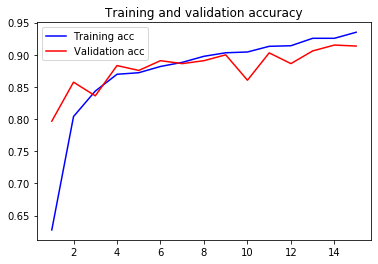

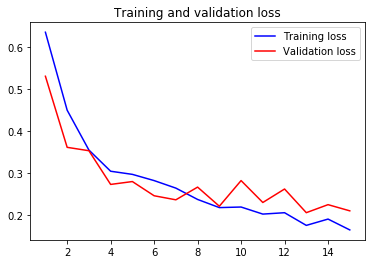

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ÉVALUATION

In [79]:
print(history.history)

{'loss': [0.6363214254379272, 0.45066604018211365, 0.35576131939888, 0.3052768111228943, 0.2978166937828064, 0.2829967439174652, 0.26506784558296204, 0.2380872666835785, 0.21868005394935608, 0.2200232744216919, 0.20319673418998718, 0.20647956430912018, 0.17630060017108917, 0.19132810831069946, 0.16550680994987488], 'accuracy': [0.6276595592498779, 0.8039513826370239, 0.8434650301933289, 0.8696048855781555, 0.8720364570617676, 0.8817629218101501, 0.888145923614502, 0.89756840467453, 0.9030395150184631, 0.9042553305625916, 0.9130699038505554, 0.9139817357063293, 0.9255319237709045, 0.9255319237709045, 0.9349544048309326], 'val_loss': [0.5314942598342896, 0.3622017800807953, 0.3541320562362671, 0.27386415004730225, 0.2806820869445801, 0.24687035381793976, 0.23721171915531158, 0.26745662093162537, 0.2219150811433792, 0.28300783038139343, 0.2308398187160492, 0.26292693614959717, 0.20657670497894287, 0.22566084563732147, 0.21093705296516418], 'val_accuracy': [0.7966616153717041, 0.8573596477

In [80]:


#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()



,loss,accuracy,val_loss,val_accuracy
0,0.636321,0.627660,0.531494,0.796662
1,0.450666,0.803951,0.362202,0.857360
2,0.355761,0.843465,0.354132,0.836115
3,0.305277,0.869605,0.273864,0.883156
4,0.297817,0.872036,0.280682,0.875569


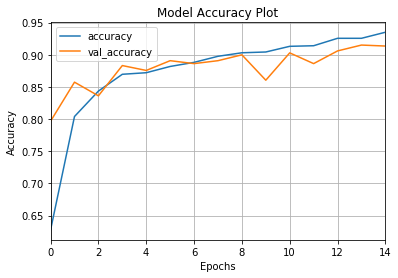

In [81]:
#plot the accuracy over the training and test set
results[["accuracy",'val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

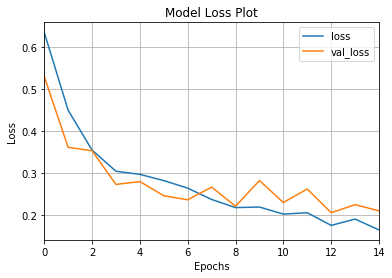

In [82]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

#Evaluate Test

In [83]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 15ms/step - loss: 0.2541 - accuracy: 0.8841


[0.25409966707229614, 0.8841463327407837]

In [84]:
y_pred= model.predict(X_test)

In [85]:
print(y_test)

[0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1]


In [86]:
print(y_pred)

[[7.70899355e-02]
 [9.99971986e-01]
 [1.51404329e-05]
 [3.13991129e-01]
 [9.98507142e-01]
 [1.43305333e-05]
 [9.99700427e-01]
 [3.64768505e-03]
 [9.99934256e-01]
 [9.97110188e-01]
 [9.99987364e-01]
 [7.19636679e-04]
 [2.25571692e-01]
 [1.73686326e-01]
 [8.71706486e-01]
 [9.99172866e-01]
 [9.99953270e-01]
 [9.99642491e-01]
 [3.38379778e-06]
 [9.98592079e-01]
 [5.35428524e-04]
 [2.17598677e-02]
 [7.98379779e-01]
 [8.46237838e-01]
 [4.94800806e-02]
 [9.99759078e-01]
 [5.34027815e-04]
 [5.22339404e-01]
 [4.41661954e-01]
 [2.69714815e-06]
 [2.52294540e-03]
 [7.63578415e-01]
 [7.43766487e-01]
 [8.54656100e-03]
 [9.54262137e-01]
 [1.14269584e-01]
 [9.99945164e-01]
 [6.46592557e-01]
 [3.91846895e-03]
 [1.77949667e-04]
 [5.63901544e-01]
 [2.48726547e-01]
 [8.45146894e-01]
 [9.08109546e-03]
 [6.90332413e-01]
 [3.32472980e-01]
 [9.98026252e-01]
 [9.97574270e-01]
 [1.39795542e-02]
 [9.58485723e-01]
 [3.56169105e-01]
 [4.77111655e-07]
 [1.63373351e-02]
 [9.98879373e-01]
 [6.58819079e-03]
 [9.907484

In [87]:
y_test.shape

(164,)

In [88]:
y_pred = y_pred.squeeze()
y_pred = np.round(y_pred)
y_pred.shape

(164,)

In [89]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[76  4]
 [15 69]]


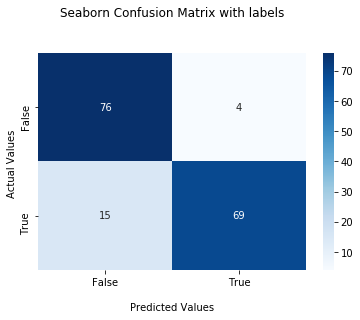

In [90]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
print(X_test.shape)

(164, 75, 75, 3)


In [92]:
img1 = X_train[0,:,:,:]
img1 = img1.reshape(-1,75,75,3)
model.predict(img1)
print(img1.shape)

(1, 75, 75, 3)


In [93]:
def prediction(id, model):
    img1 = X_train[id,:,:,:]
    img1 = img1.reshape(-1,75,75,3)
    return model.predict(img1)[0][0]

In [135]:
print(prediction(1, model))
print(prediction(2, model))
print(prediction(0, model))
print(prediction(11, model))


0.050052524
0.00043043494
0.005086869
0.99270904


In [124]:
for i in range(10):
    print(prediction(i, model), round(prediction(i, model)))

0.005086869 0
0.050052524 0
0.00043043494 0
0.009451121 0
0.99533397 1
0.9373043 1
0.9486679 1
0.10615933 0
0.9984307 1
0.0008431971 0


In [125]:
model.predict(img1)

array([[0.00508687]], dtype=float32)

In [126]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.h5")
print("Saved model to disk")

Saved model to disk


In [127]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, load_model
import tensorflow.keras.backend as K
import numpy as np
from imageio import imread, imsave
from PIL import Image
import re
import pandas
import sys
import os

In [166]:
def init():
    json_file = open('/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_json = model_from_json(loaded_model_json)
    #load weights into new model
    loaded_model_json.load_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.h5")
    print("Loaded Model from disk")

    #compile and evaluate loaded model
    loaded_model_json.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return loaded_model_json

In [222]:
def preprocessing_train(id):
    x = X_train[id,:,:,:]
    x = np.resize(x,(1,75,75,3))
    x = np.array(x) 
    return x

xtrain = preprocessing_train(6)   

In [223]:
def preprocessing_test(path):
    x = Image.open(path)
    x = np.resize(x,(1,75,75,3))
    x = np.array(x) 
    x = (x - x.mean())/255.
    return x

xtest=preprocessing_test('/home/apprenant/Downloads/6.png')   

In [225]:
from PIL import Image 
import numpy as np 
    
def predict(x):
    model=init()
    out = model.predict(x)[0][0]
    return round(out),  out

In [226]:
X_train[0,:,:,:].shape

(75, 75, 3)

In [227]:
predict(xtrain)

Loaded Model from disk


(1, 0.9486679)

In [228]:
predict(xtest)

Loaded Model from disk


(1, 0.8959032)